# Example MLP: Data base Iris

In this example it will show how to work the library **deepensemble**. 

## Data

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

- Predicted attribute: class of iris plant.
- Number of Instances: 150
- Number of Attributes: 4

This data differs from the data presented in Fishers article (identified by Steve Chadwick, <spchadwick@espeedaz.net>). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

In [1]:
import theano
import theano.tensor as T
import numpy as np
from sklearn.datasets import load_iris
from theano.sandbox import cuda

iris = load_iris()

data_input    = np.asarray(iris.data, dtype=theano.config.floatX)
data_target   = iris.target_names[iris.target]
classes_names = iris.target_names

## Training MLP

The arquitecture of MLP net is a 3 neurons in hidden layer and the output is a vector with 3 elements that represent each class (**one hot encoding**). The cost function is **MSE** and the update funtion is **ADAGRAD**. The 60% of data set it's used for the training set and 40% in the testing set.

#### Important: the library deepensemble must be installed.

In [2]:
from deepensemble.models.sequential import Sequential
from deepensemble.layers.dense import Dense
from deepensemble.utils.cost_functions import *
from deepensemble.utils.update_functions import *
from deepensemble.utils.regularizer_functions import *
from sklearn import cross_validation

net1 = Sequential("mlp", "classifier", classes_names)
net1.add_layer(Dense(n_input=data_input.shape[1], n_output=2, activation=T.tanh))
net1.add_layer(Dense(n_output=len(classes_names), activation=T.tanh))
net1.append_cost(mse)
net1.append_reg(L1, lamb=0.005)
net1.append_reg(L2, lamb=0.001)
net1.set_update(adagrad, initial_learning_rate=0.1)
net1.compile()

max_epoch = 300

input_train, input_test, target_train, target_test = cross_validation.train_test_split(
        data_input, data_target, test_size=0.3, random_state=0)

metrics = net1.fit(input_train, target_train,
                                max_epoch=max_epoch, batch_size=32, improvement_threshold=0.9995)
# Compute metrics
metrics.append_prediction(target_test, net1.predict(input_test))

Start Compile mlp  - elapsed: 11.69 [s]
mlp - epoch:[####################] 300/300 elapsed: 0.35[s] - left: 0.00[s] 


## Results

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        18
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



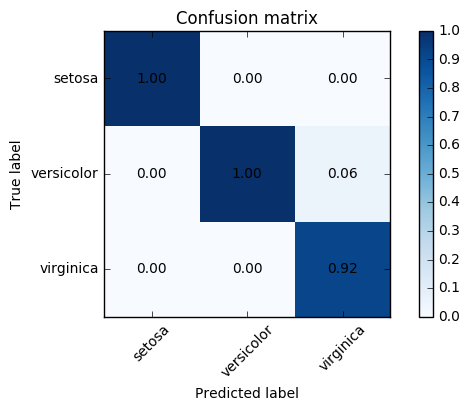

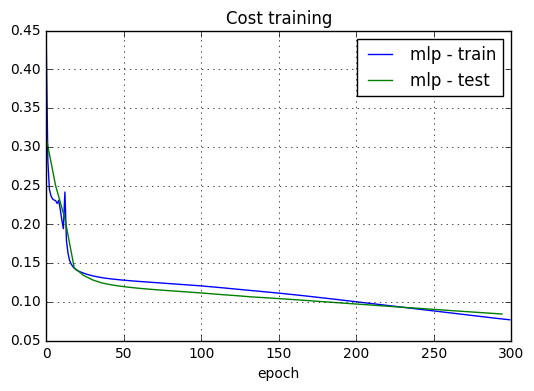

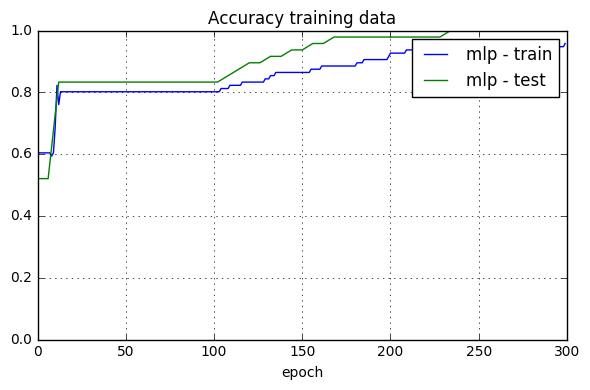

In [3]:
%matplotlib inline
import matplotlib.pylab as plt

metrics.classification_report()
metrics.plot_confusion_matrix()
metrics.plot_cost(max_epoch, "Cost training")
metrics.plot_score(max_epoch, "Accuracy training data")

plt.tight_layout()